# Intro

### Labels Overview

In [1]:
import pandas as pd
pd.read_csv('../input/traffic-signs-classification/labels.csv')

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


#   

# Importing Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

# Data Collection

In [3]:
dir_path = '../input/gtsrb-german-traffic-sign'

In [4]:
os.listdir(dir_path)

['Meta',
 'meta',
 'Meta.csv',
 'Train.csv',
 'Test.csv',
 'Test',
 'test',
 'Train',
 'train']

In [5]:
#Assigning the path for train and test images

train_path = dir_path +'/Train'
test_path = dir_path + '/Test'

In [6]:
print(sorted(os.listdir(train_path)))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [7]:
sorted(os.listdir(test_path))

['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

##   

# Visualization

#### Visualizing 25 random sample images from test set

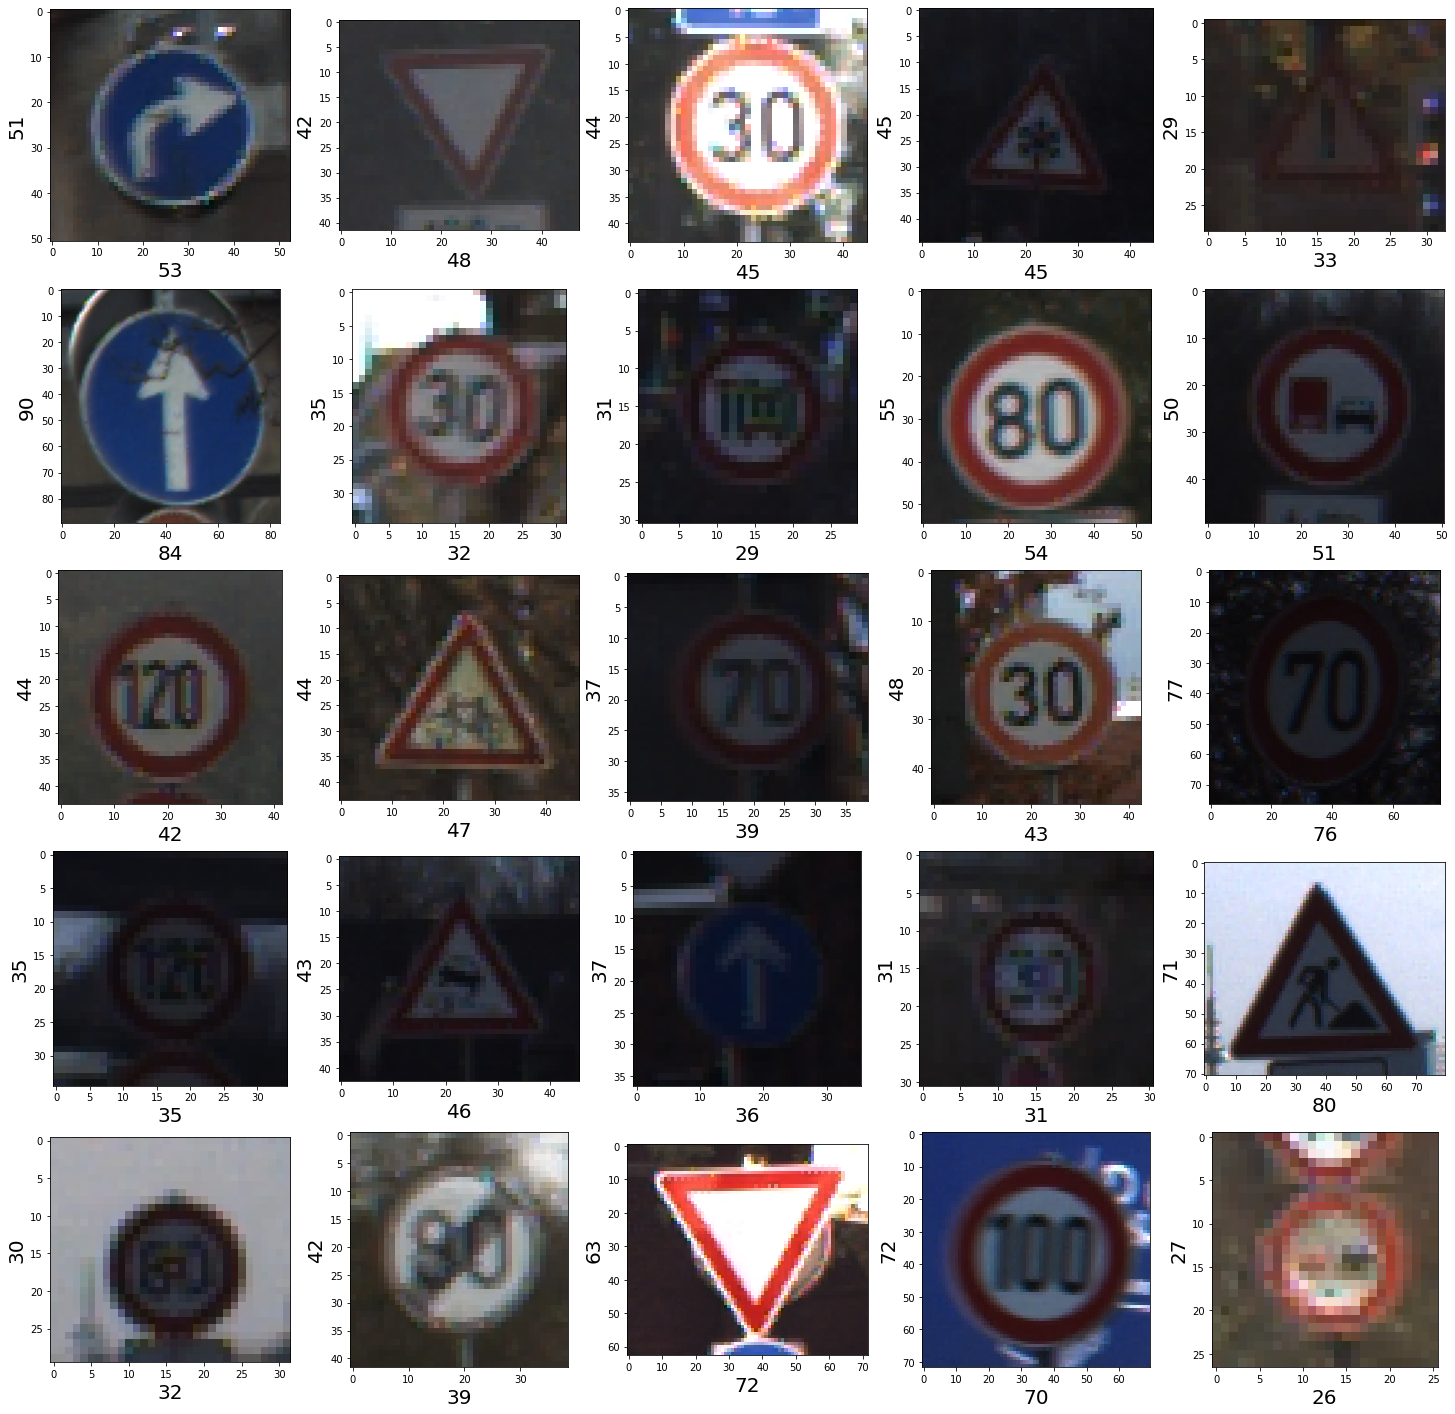

In [8]:
import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image


In [9]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

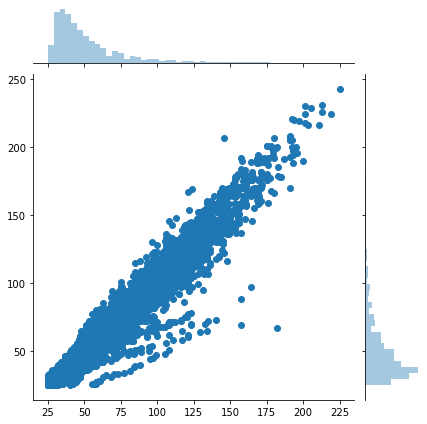

In [10]:
sns.jointplot(dim1,dim2)
plt.show()

In [11]:
np.mean(dim1)

50.328929582493814

In [12]:
np.mean(dim2)

50.83587951745773

In [13]:
image_shape = (50,50)

## Data Preprocessing

In [14]:
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [15]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [16]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [17]:
images.shape

(39209, 50, 50, 3)

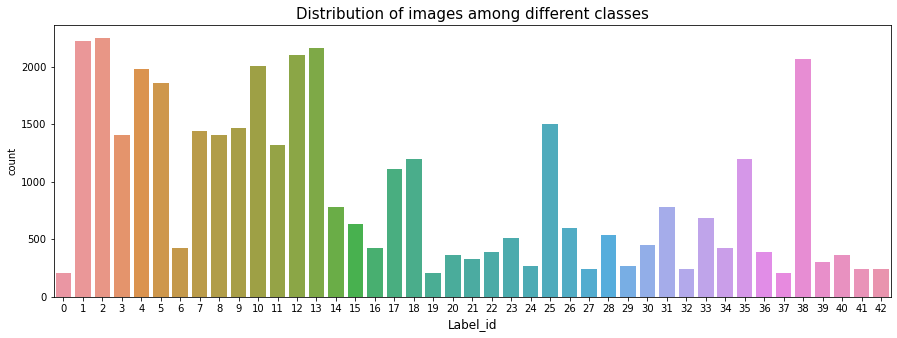

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

In [19]:
#Saving the scaled images and labels for future use
np.save('Training_set', images)
np.save('Label_Id', label_id)

## Splitting the train data into train and validation data

In [20]:
import numpy as np
import pandas as pd

In [21]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

In [22]:
#Splitting the data
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

#### Changing target labels to categorical  using one-hot encoding technique

In [23]:
#keras has a built-in function for one-hot encoding.
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)

#    

## Model Building

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [25]:
model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 2

)

Epoch 1/25
491/491 - 4s - loss: 2.6362 - accuracy: 0.2595 - val_loss: 1.5838 - val_accuracy: 0.5147
Epoch 2/25
491/491 - 3s - loss: 1.3620 - accuracy: 0.5587 - val_loss: 0.6447 - val_accuracy: 0.8628
Epoch 3/25
491/491 - 3s - loss: 0.8234 - accuracy: 0.7286 - val_loss: 0.3791 - val_accuracy: 0.9189
Epoch 4/25
491/491 - 3s - loss: 0.5965 - accuracy: 0.8019 - val_loss: 0.2265 - val_accuracy: 0.9482
Epoch 5/25
491/491 - 3s - loss: 0.4995 - accuracy: 0.8379 - val_loss: 0.1839 - val_accuracy: 0.9603
Epoch 6/25
491/491 - 3s - loss: 0.4181 - accuracy: 0.8620 - val_loss: 0.1204 - val_accuracy: 0.9709
Epoch 7/25
491/491 - 3s - loss: 0.3714 - accuracy: 0.8778 - val_loss: 0.1098 - val_accuracy: 0.9806
Epoch 8/25
491/491 - 3s - loss: 0.3393 - accuracy: 0.8913 - val_loss: 0.0848 - val_accuracy: 0.9802
Epoch 9/25
491/491 - 3s - loss: 0.3100 - accuracy: 0.8998 - val_loss: 0.0844 - val_accuracy: 0.9816
Epoch 10/25
491/491 - 3s - loss: 0.2859 - accuracy: 0.9068 - val_loss: 0.0702 - val_accuracy: 0.9828

In [29]:
#Saving the model
model.save('Model_cnn.h5')

## Model Evaluation


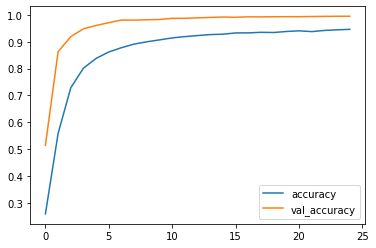

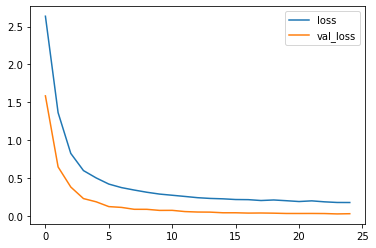

In [30]:
evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

####   

## Testing on test data

In [31]:
from tensorflow.keras.models import load_model
model = load_model('Model.h5')

In [32]:
test_path = '../input/test-images/Test'
test_img = sorted(os.listdir(test_path))

In [33]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [34]:
test_images = scaling(test_img,test_path)

#### Test labels

In [35]:
test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

y_test = test['ClassId'].values

y_test

array([16,  1, 38, ...,  6,  7, 10])

## Testing on test images

In [36]:
y_pred = model.predict_classes(test_images)

y_pred

array([16,  1, 38, ...,  6,  7, 10])

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      0.98      0.99       720
           2       0.99      0.99      0.99       750
           3       1.00      0.93      0.96       450
           4       0.99      0.98      0.99       660
           5       0.93      0.98      0.95       630
           6       1.00      0.93      0.96       150
           7       0.98      0.99      0.98       450
           8       0.98      0.97      0.97       450
           9       0.95      1.00      0.97       480
          10       0.99      0.99      0.99       660
          11       0.96      0.99      0.98       420
          12       0.99      0.91      0.95       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.90      1.00      0.95       210
          16       1.00      0.99      1.00       150
          17       1.00    